캘리포니아 주택 가격 데이터셋을 사용하겠습니다.<br>
사이킷런의 fetch_california_housing() 함수를 사용해 데이터를 적재하겠습니다.<br>
이 데이터셋은 수치 특성만 있고, 누락된 데이터도 없습니다.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

분류에서 했던 것과 비슷합니다.<br>
주된 차이점은 출력층이 활성화 함수가 없는 하나의 뉴런을 가진다는 것과<br>
손실 함수로 평균 제곱 오차를 사용한다는 것입니다.

이 데이터셋에는 잡음이 많기 때문에 과대적합을 막기 위해 뉴런 수가 적은<br>
은닉층 하나만 사용하겠습니다.

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(units=30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(units=1)
])

In [7]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 870us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 867us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 807us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 765us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 760us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 790us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 805us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 794us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 796us/step - loss: 0.4875 

In [9]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 596us/step - loss: 0.4212


테스트 셋에서 조금 가져온 걸 새로운 샘플이라고 가정하고<br>
예측을 해보겠습니다.

In [10]:
X_new = X_test[:3]

In [11]:
y_pred = model.predict(X_new)
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

아래는 loss가 어떻게 감소했는지를 보여주는 그래프입니다.

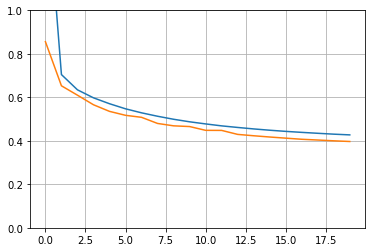

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

loss가 train, val 세트 모두에 대해 계속 줄어들고 있음을 알 수 있습니다.